# loan_prediction

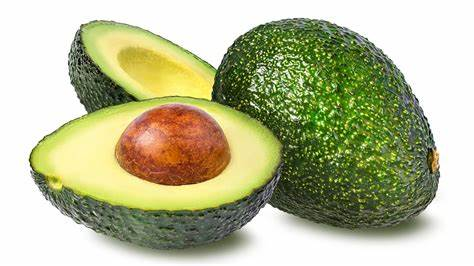

## Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. . 

# Importing Libraries

In [2]:
#For numerical computation
import numpy as np
#For data Manipulation
import pandas as pd
import scipy
import sklearn
import seaborn as sns
#Used for data visualisation purpose.
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [3]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [4]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore


# Data Analysis Phase

## 1.Reading data frame

In [5]:
df = pd.read_csv("loan_prediction.csv")

In [6]:
df.shape

(614, 13)

### In our dataset total  614 rows and 13 Columns

In [8]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [9]:
df.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [10]:
df.sample(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
281  LP001914   Male     Yes          0      Graduate            No   
249  LP001825   Male     Yes          0      Graduate            No   
585  LP002912   Male     Yes          1      Graduate            No   
483  LP002541   Male     Yes          0      Graduate            No   
515  LP002659   Male     Yes         3+      Graduate            No   
445  LP002429   Male     Yes          1      Graduate           Yes   
109  LP001384   Male     Yes         3+  Not Graduate            No   
8    LP001018   Male     Yes          2      Graduate            No   
133  LP001482   Male     Yes          0      Graduate           Yes   
456  LP002459   Male     Yes          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
281             3927              800.0       112.0             360.0   
249             1809             1868.0        90.0             360.0   
585             4283             3000.0       172.0              84.0   
483            10833                0.0       234.0             360.0   
515             3466             3428.0       150.0             360.0   
445             3466             1210.0       130.0             360.0   
109             2071              754.0        94.0             480.0   
8               4006             1526.0       168.0             360.0   
133             3459                0.0        25.0             120.0   
456             4301                0.0       118.0             360.0   

     Credit_History Property_Area Loan_Status  
281             1.0     Semiurban           Y  
249             1.0         Urban           Y  
585             1.0         Rural           N  
483             1.0     Semiurban           Y  
515             1.0         Rural           Y  
445             1.0         Rural           Y  
109             1.0     Semiurban           Y  
8               1.0         Urban           Y  
133             1.0     Semiurban           Y  
456             1.0         Urban           Y

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Observation
- As we drop the  Unnamed: 0 column beacuse it has no effect on our dataset

In [10]:
df.drop('Unnamed: 0',inplace = True ,axis = 1)

In [11]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

## Observation:
- After dropping the coulm now we can check shape and column of the data

In [12]:
df.shape

(18249, 13)

In [13]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [14]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [15]:
df.tail()

Date  AveragePrice  Total Volume     4046     4225    4770  \
18244  2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [16]:
df.sample()

Date  AveragePrice  Total Volume   4046     4225  4770  \
14416  2016-03-27          1.45       2927.32  59.51  1996.63  1.92   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year   region  
14416      869.26         0.0      869.26          0.0  organic  2016  Spokane

## Checking the datatype of every feature

In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Observation:
As per problem statement our independent feature is float value so its a
- regression Problems for finding sale price prediction
- Classification problem for region defining

## Checking five number summery of data

In [13]:
df.describe().T

count         mean          std    min     25%     50%  \
ApplicantIncome    614.0  5403.459283  6109.041673  150.0  2877.5  3812.5   
CoapplicantIncome  614.0  1621.245798  2926.248369    0.0     0.0  1188.5   
LoanAmount         592.0   146.412162    85.587325    9.0   100.0   128.0   
Loan_Amount_Term   600.0   342.000000    65.120410   12.0   360.0   360.0   
Credit_History     564.0     0.842199     0.364878    0.0     1.0     1.0   

                       75%      max  
ApplicantIncome    5795.00  81000.0  
CoapplicantIncome  2297.25  41667.0  
LoanAmount          168.00    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0

## Observation:
- ApplicantIncome	
- CoapplicantIncome	
- LoanAmount	
- Loan_Amount_Term	
- Credit_History

In [16]:
df.nuunique()

AttributeError: 'DataFrame' object has no attribute 'nuunique'

- To check the number of null values in the dataset columns

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Observation
- There is no such row which has missing values 
- Now our dataframe is nullfree


# Scatterplot

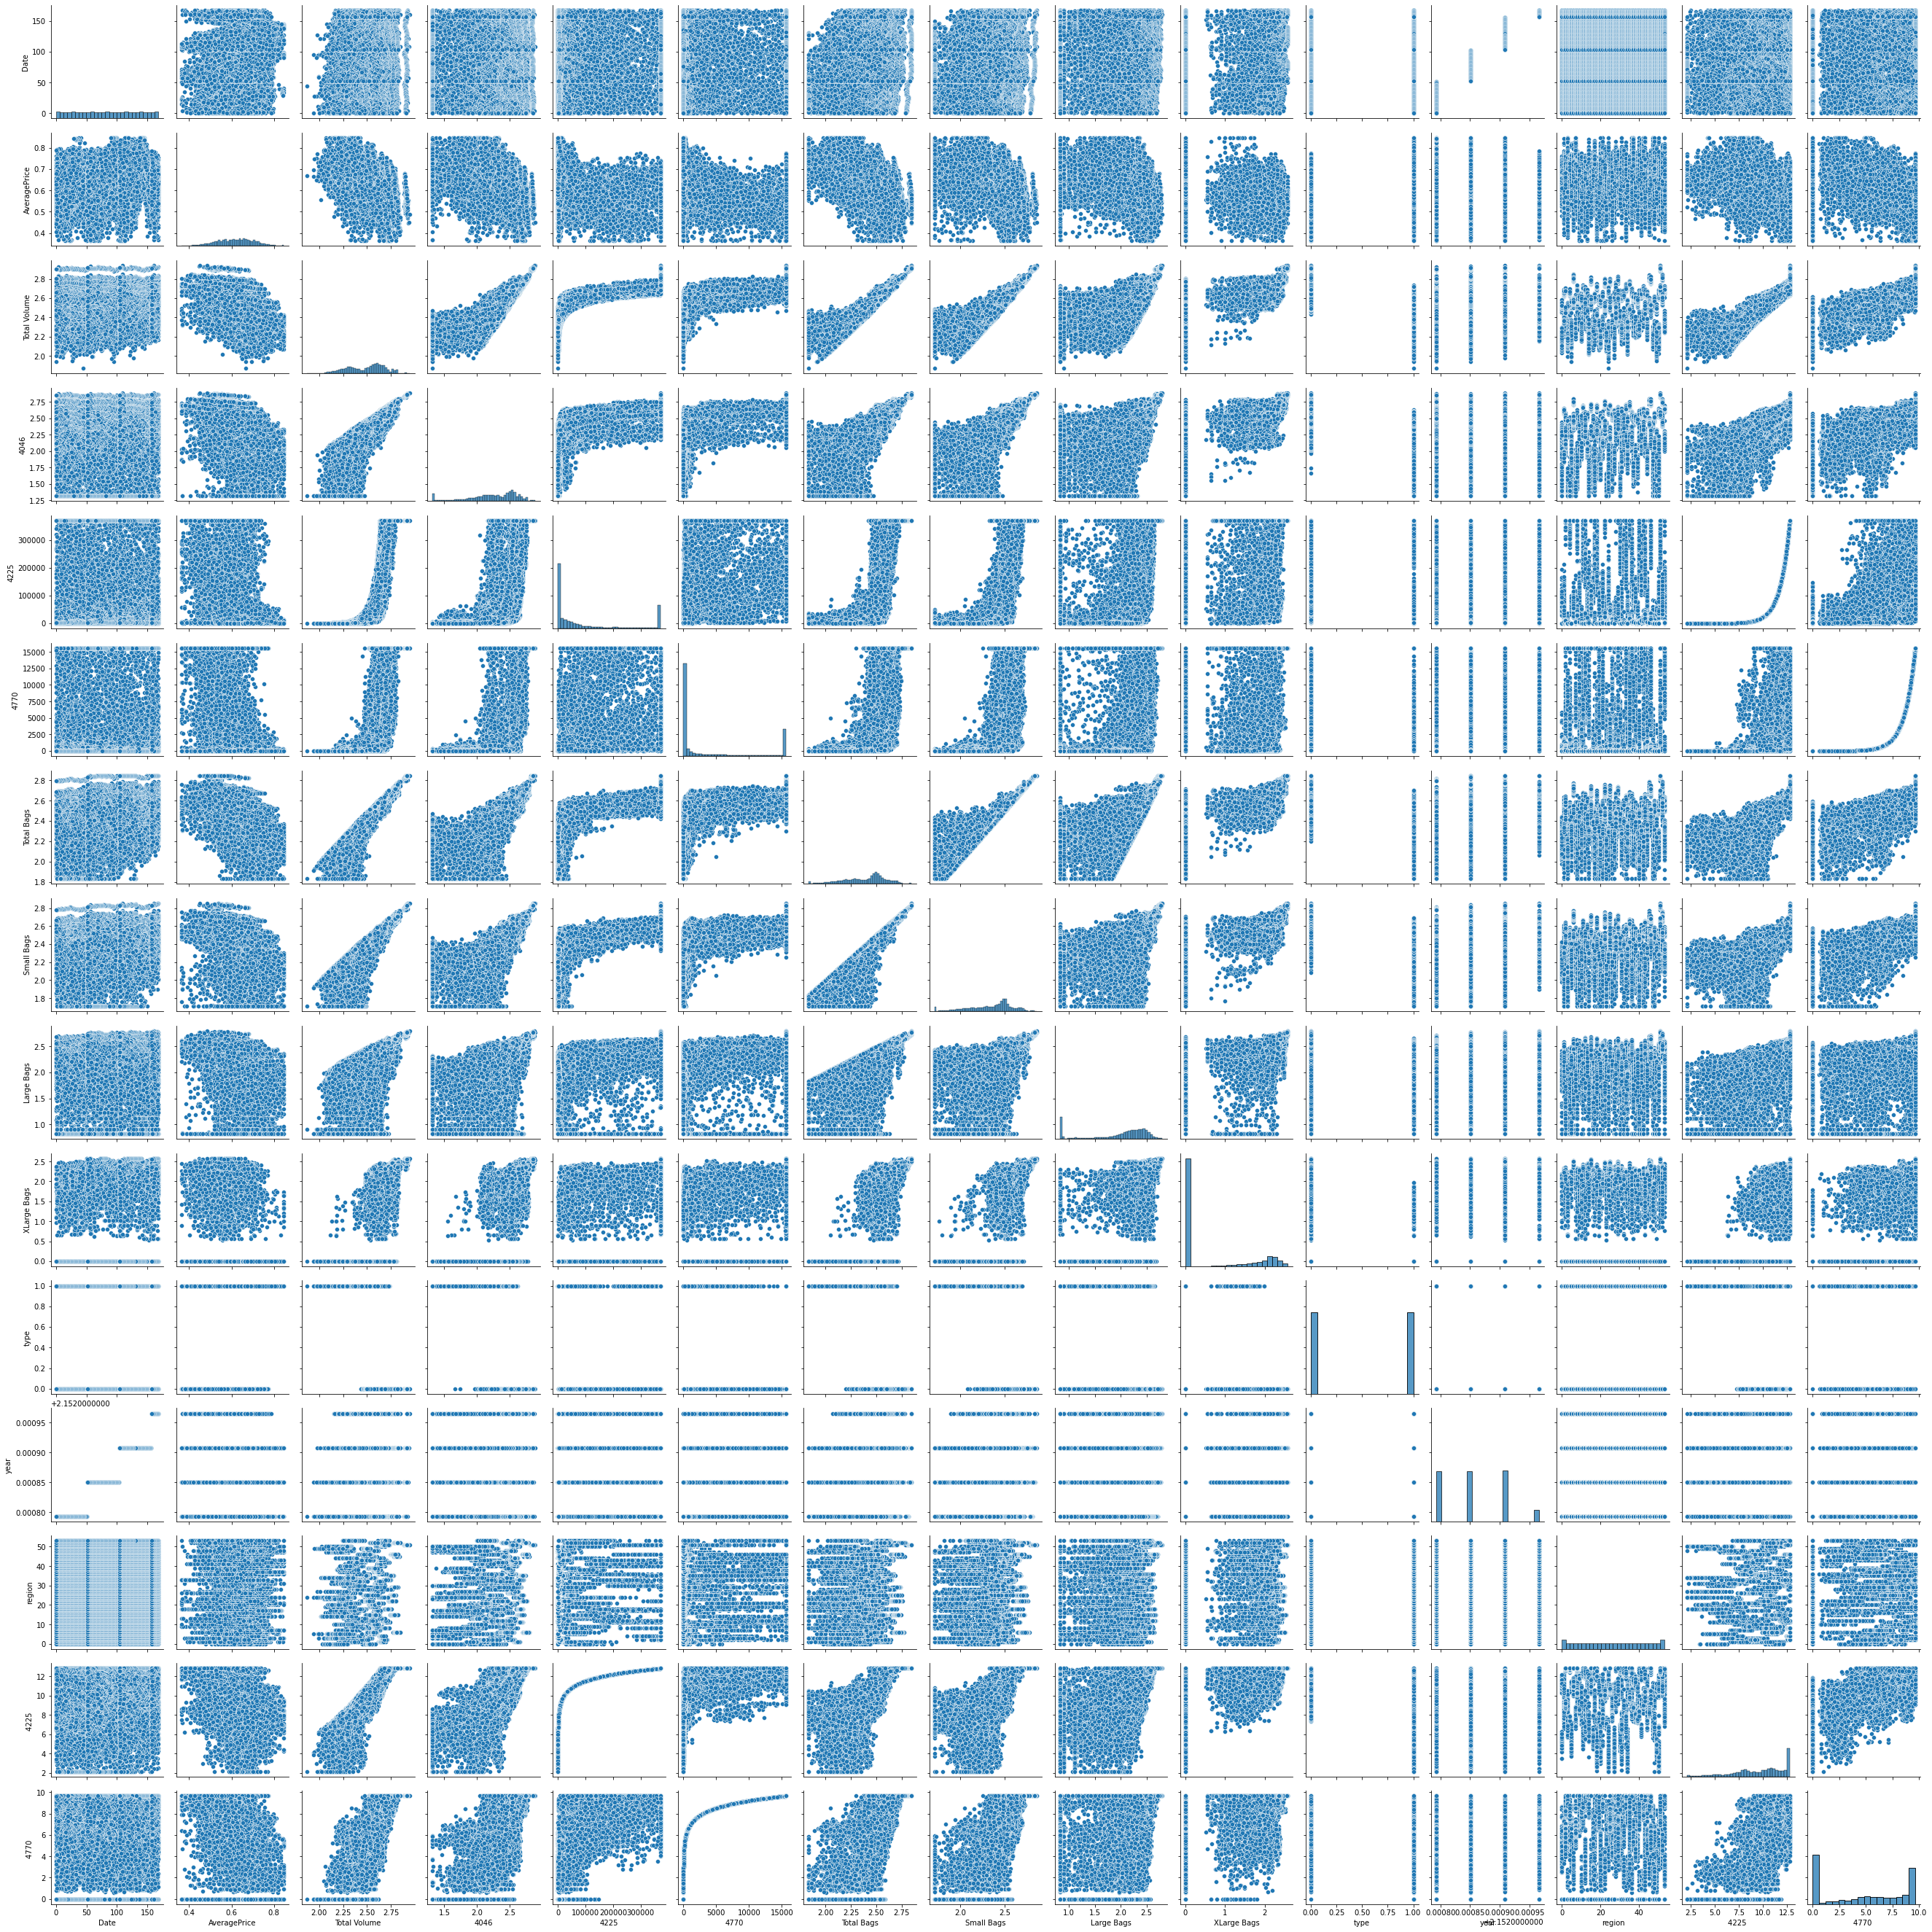

In [115]:
sns.pairplot(df)

## Checking Categorical Variable

In [21]:
df.describe(include="O")

Date          type  region
count        18249         18249   18249
unique         169             2      54
top     2015-12-27  conventional  Albany
freq           108          9126     338

## Regarding Data
- There is 2 categories in "type" (Conventional & organic)
- There are 54 region with 1 unique conventional type


## Frequency with number of occurance
- There are 1517 type avacode are produced with conventional method
- There are 76 store  are located in california 


## 1.Checking Numerical Variable

In [22]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [23]:
numerical_features

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

### 1.1 Checking Data Distribution

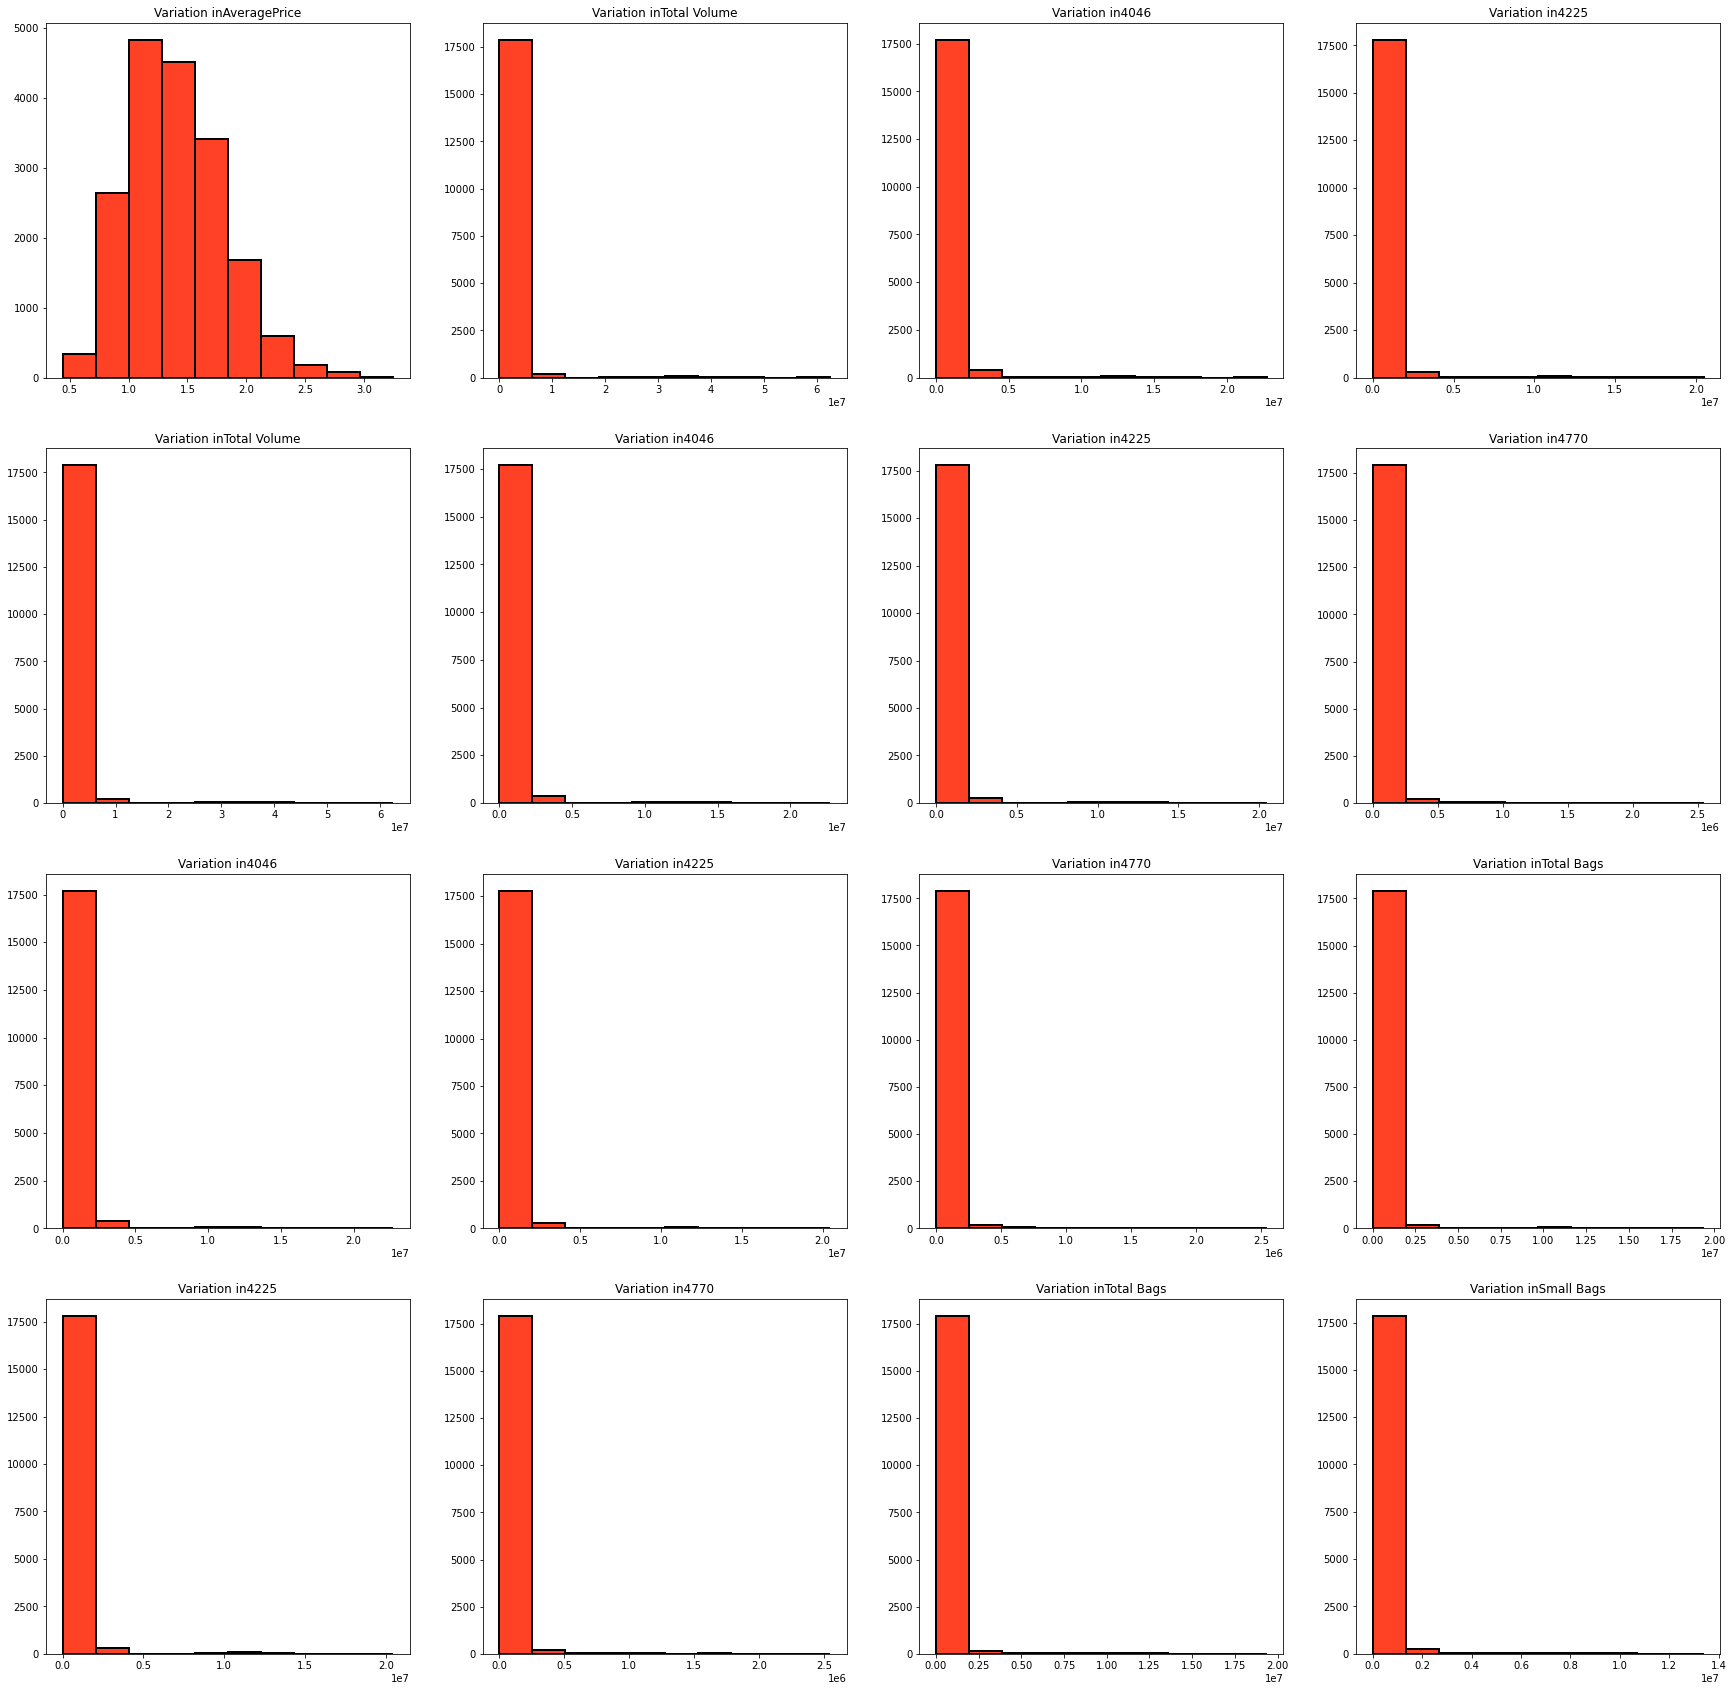

In [24]:
fig,axes=plt.subplots(4,4)
columns=['AveragePrice', 'Total Volume', '4046', '4225',"4770", 'Total Bags',
       'Small Bags', 'Large Bags',"XLarge Bags","year"]
for i in range (4):
    for j in range (4):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation in'+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(30,30)
# fig.tight_layout()

### 1.2 Univariate Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

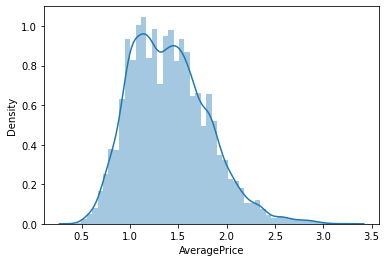

In [25]:
sns.distplot(df["AveragePrice"])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

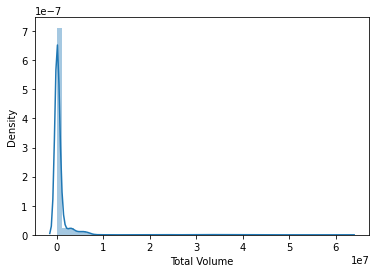

In [26]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

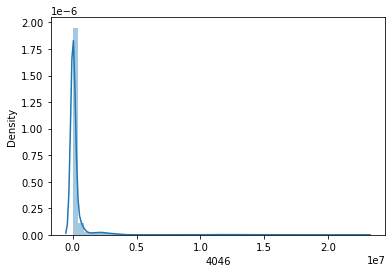

In [27]:
sns.distplot(df["4046"])


<AxesSubplot:xlabel='4225', ylabel='Density'>

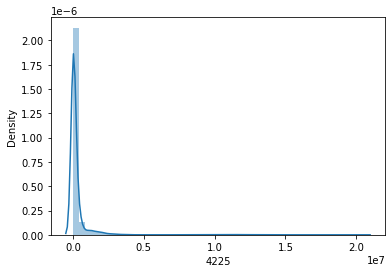

In [28]:
sns.distplot(df["4225"])

<AxesSubplot:xlabel='4770', ylabel='Density'>

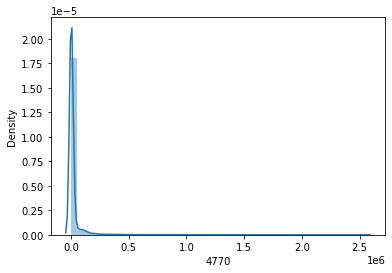

In [29]:
sns.distplot(df["4770"])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

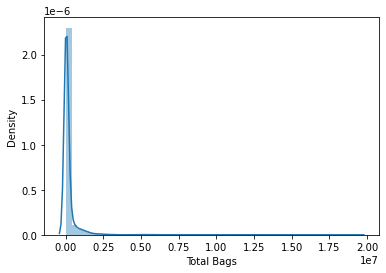

In [30]:
sns.distplot(df["Total Bags"])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

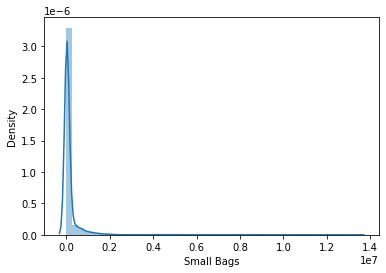

In [31]:
sns.distplot(df["Small Bags"])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

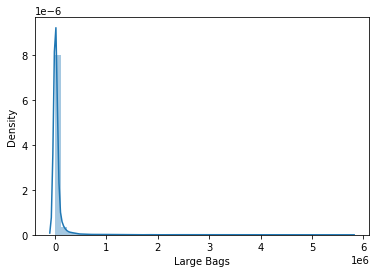

In [32]:
sns.distplot(df["Large Bags"])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

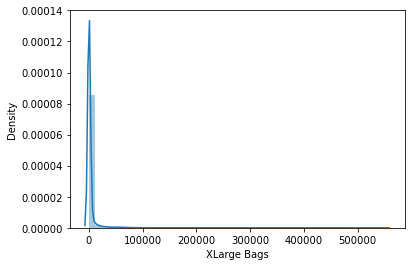

In [33]:
sns.distplot(df["XLarge Bags"])

<AxesSubplot:xlabel='year', ylabel='Density'>

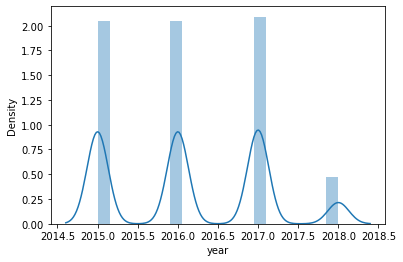

In [34]:
sns.distplot(df["year"])

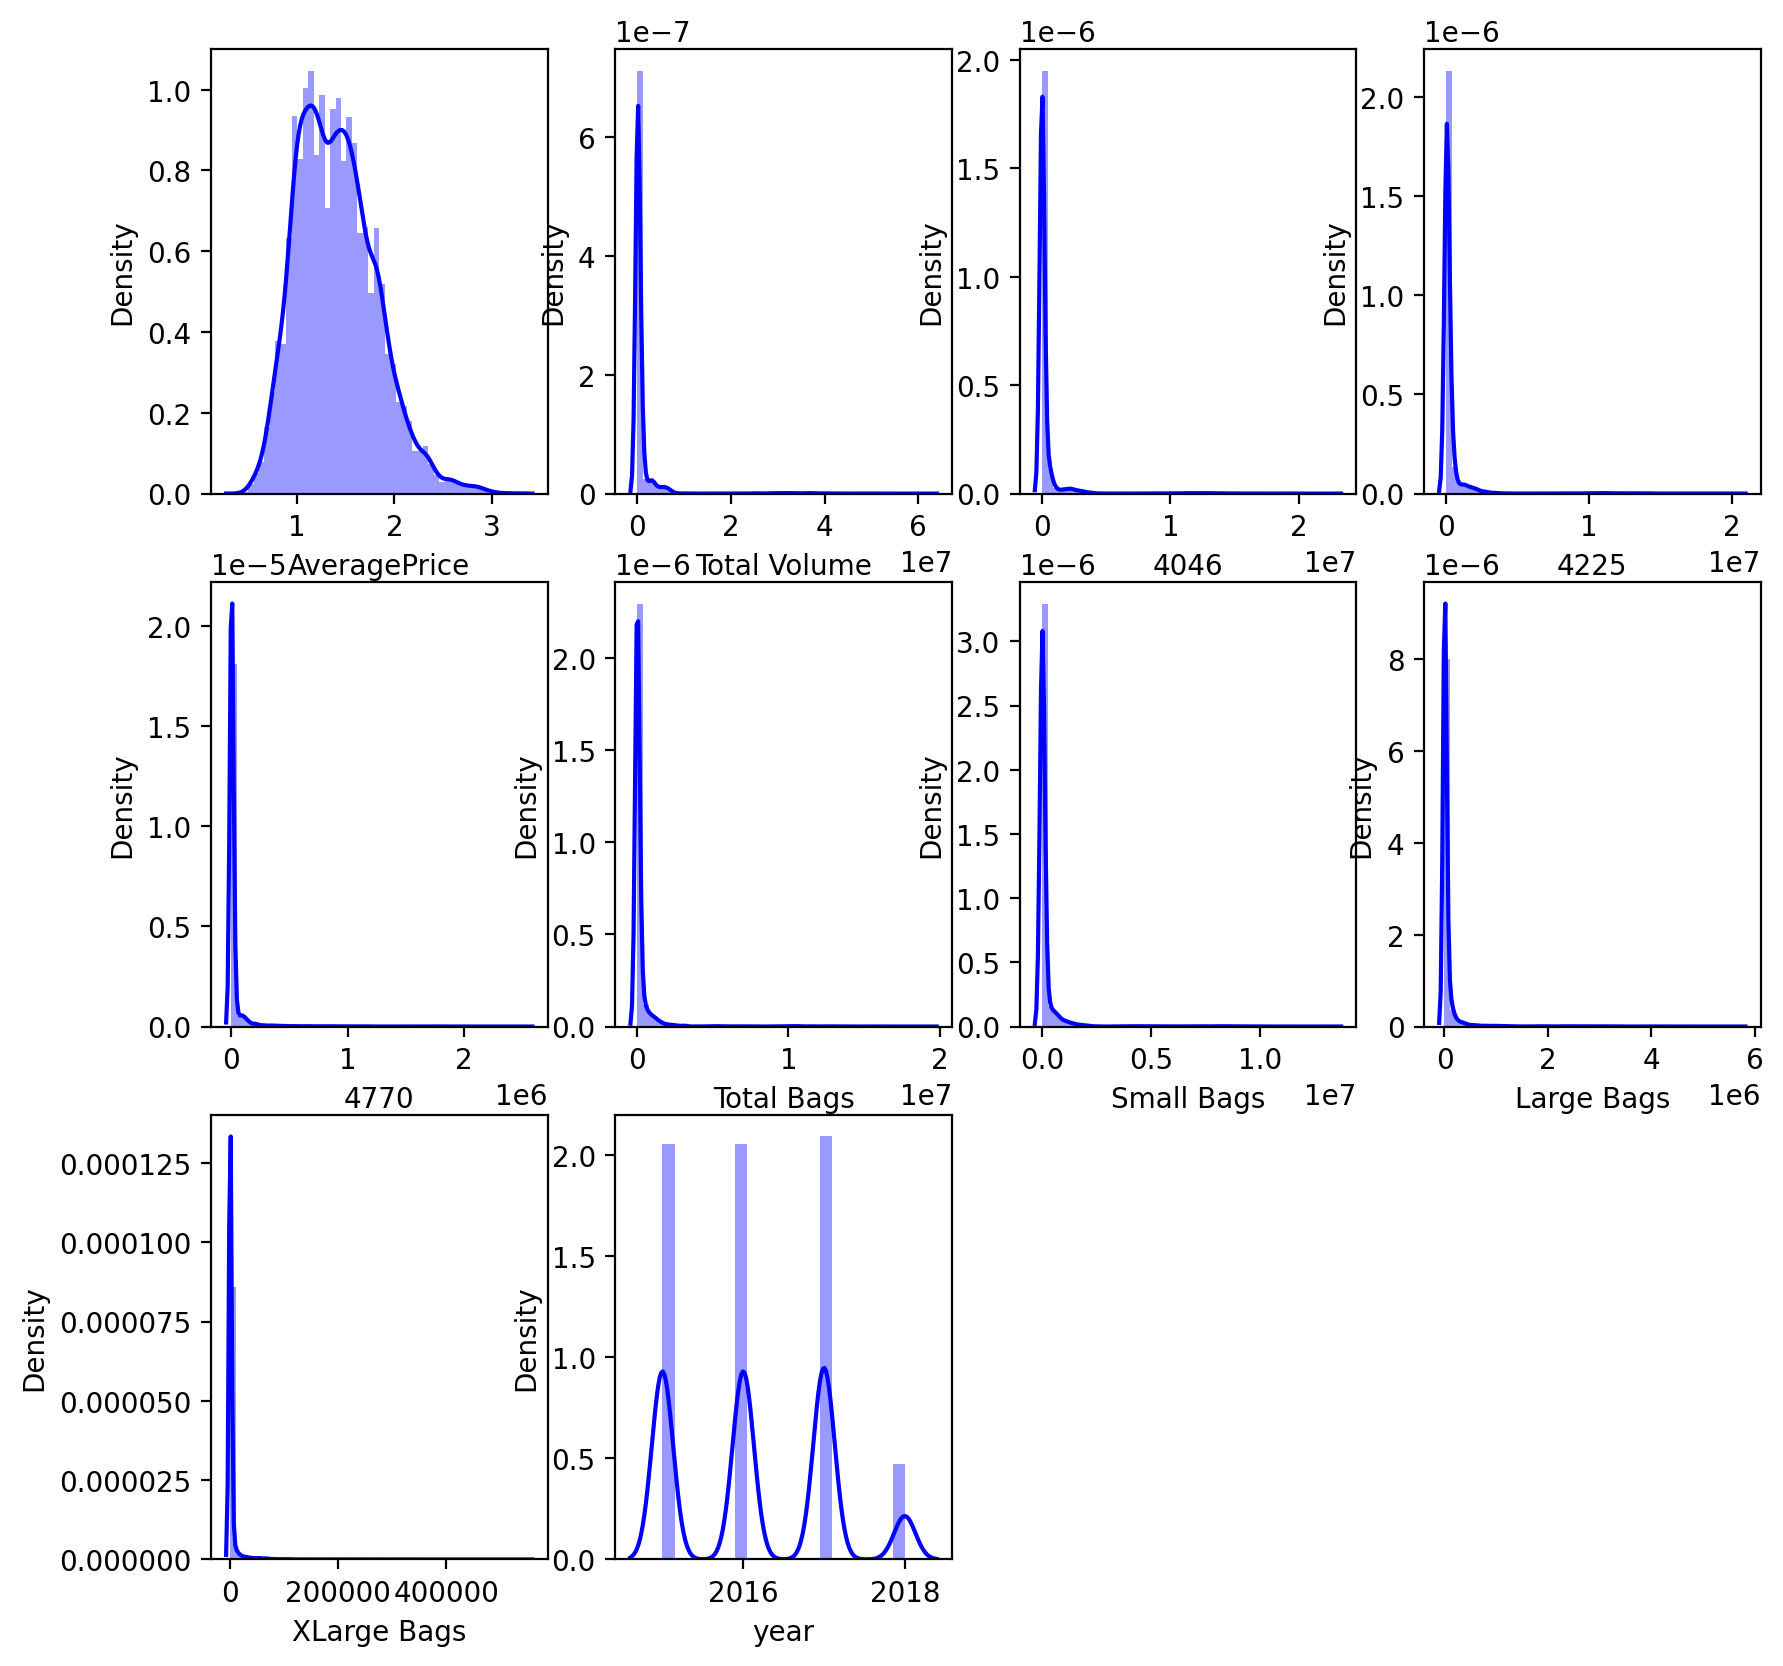

In [35]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(numerical_features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')


# Observation:
- Average price column is normally distributing over the distplot.
- Remaining of the data are likely left skewed.So we need to removed the skewness from te data
- As skewness present in data. All data need to transform into Gaussian distribution 

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

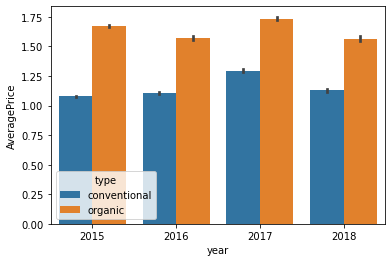

In [36]:
sns.barplot(x = 'year',y ='AveragePrice',hue='type',data = df )

## Observation
- If we see that maximum average price is in 2017 for both type conventional and organic

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

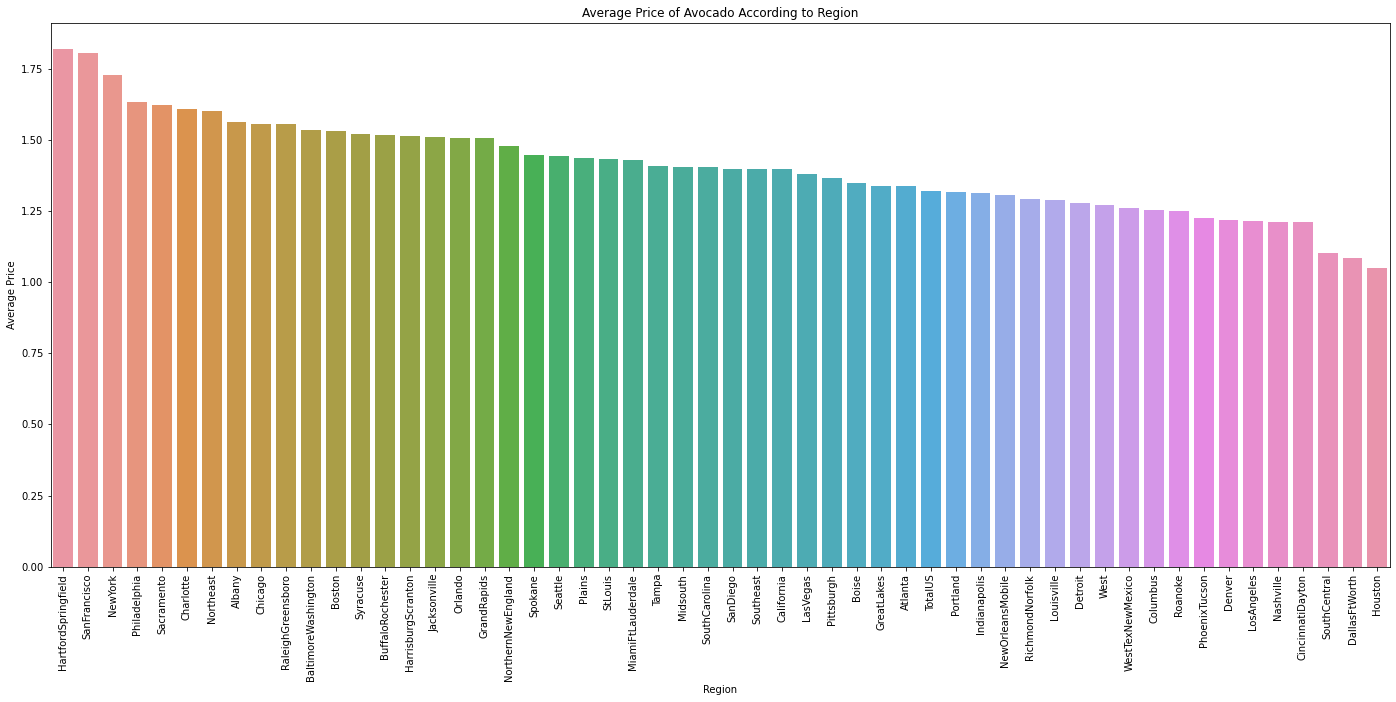

In [37]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df2=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df2.average_price.sort_values(ascending=False).index.values
sorted_data=df2.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

# Observation:
Below are the regions where price is high 
- HartfordSpringfield
- SanFrancisco
- NewYork
- Philadelphia
- Sacramento

Text(0.5, 1.0, 'Average of Total Volume According to Region')

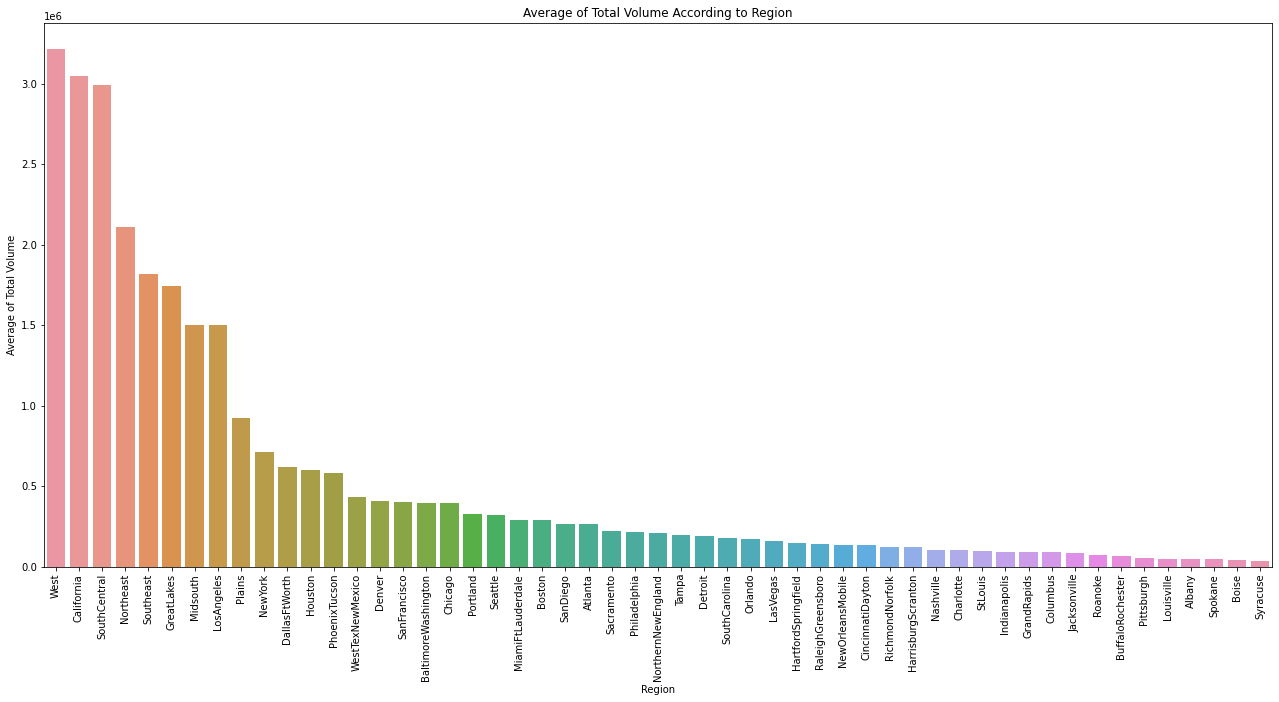

In [38]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

## Observation
These region are where Consumption is very high
- West
- California
- SouthCentral
- Northeast
- Southeast

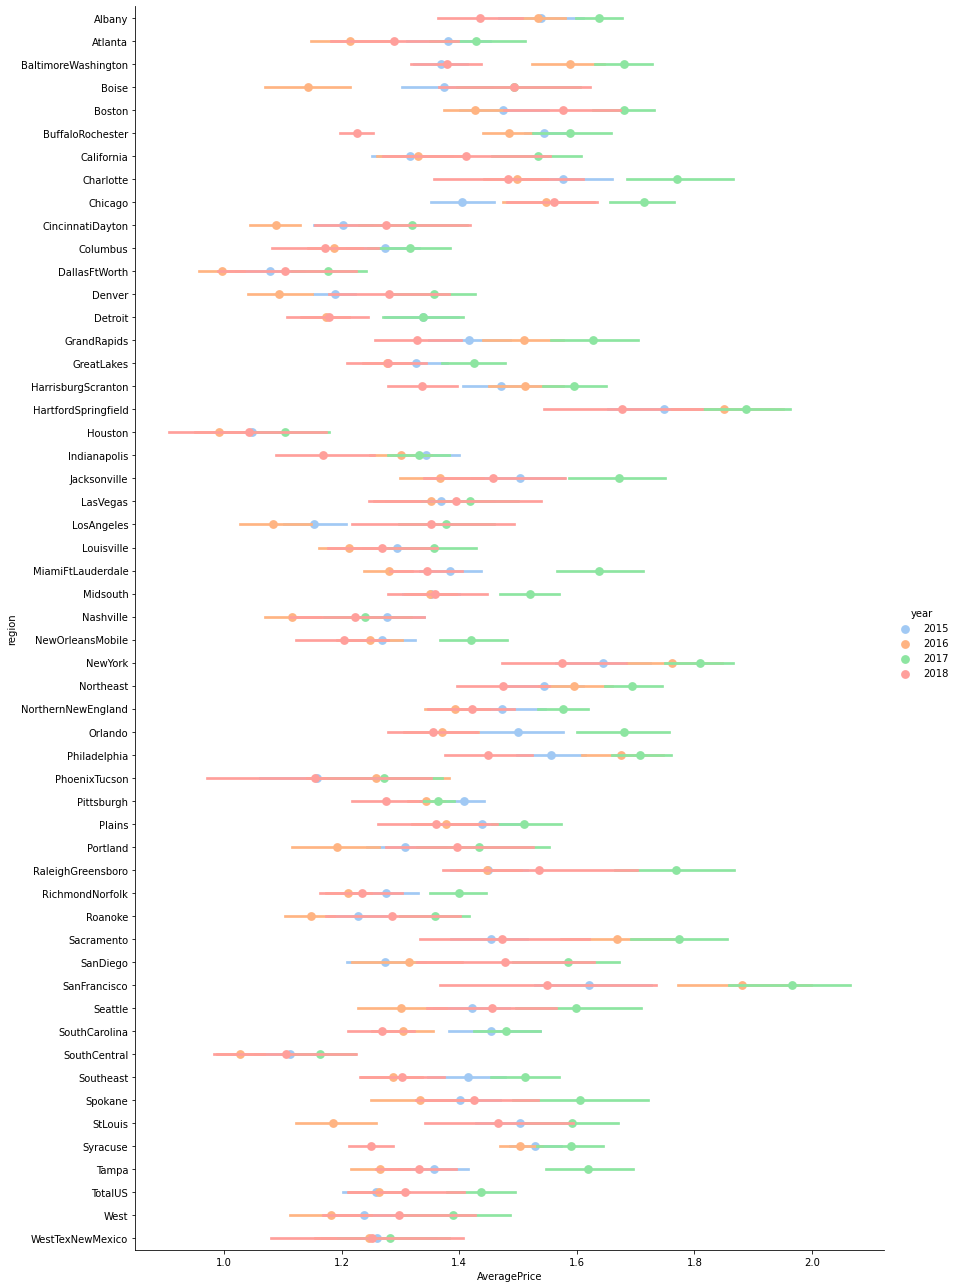

In [39]:
db = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='pastel',
                   join=False,
              )

# Observation
- There is too much demand and hike in price in year 2017  at the SanFranciso region.

In [116]:
avocado_df = df[['Date', 'AveragePrice']] 
avocado_df

Date  AveragePrice
0       51.0      0.612950
1       50.0      0.617569
2       49.0      0.505323
3       48.0      0.549489
4       47.0      0.601128
...      ...           ...
18244  161.0      0.676501
18245  160.0      0.691620
18246  159.0      0.719941
18247  158.0      0.729962
18248  157.0      0.674563

[18249 rows x 2 columns]

Text(0.5, 1.0, 'Average Price')

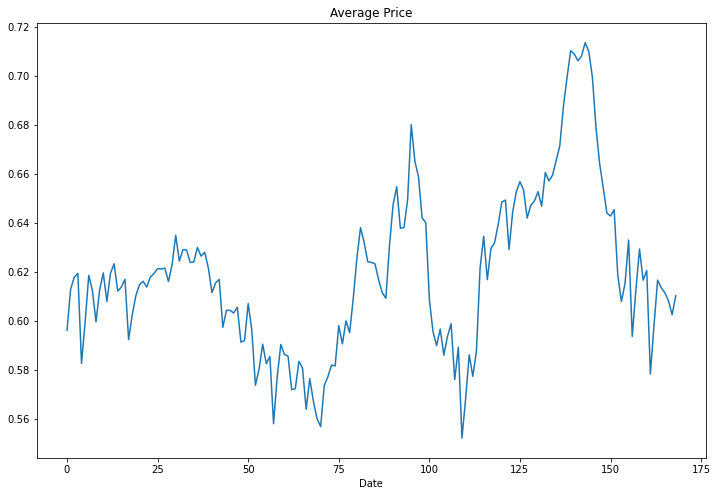

In [117]:
Dateby=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
Dateby['AveragePrice'].plot()
plt.title('Average Price')

## Observation
- This also shows there was a huge hike in prices after July 2017 and before Jan 2018.

## Checking Outlier

AveragePrice       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Total Volume    AxesSubplot(0.327174,0.657941;0.168478x0.222059)
4046            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
4225            AxesSubplot(0.731522,0.657941;0.168478x0.222059)
4770               AxesSubplot(0.125,0.391471;0.168478x0.222059)
Total Bags      AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Small Bags      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Large Bags      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
XLarge Bags           AxesSubplot(0.125,0.125;0.168478x0.222059)
year               AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

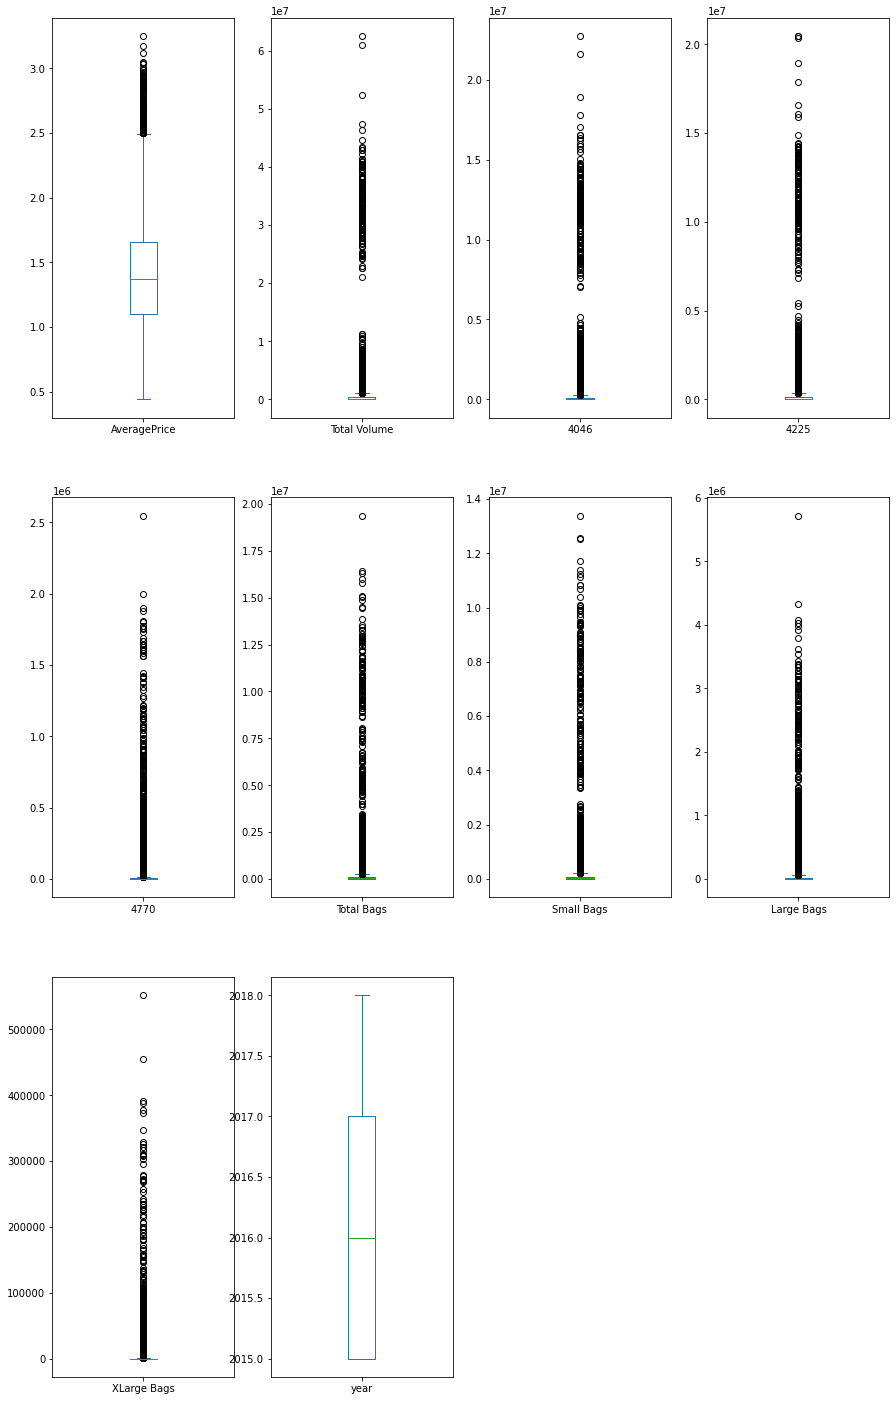

In [42]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,25))

## Observation
- From above resuits we can see that there are dots in most of the column which are referring to the outliers, hence most of the data are outside the distribution.
-  we required to remove outlier by using z score or iqr method

## Variable Encoding

In [118]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df['type'] = le.fit_transform(df['type'])
df['Date'] = le.fit_transform(df['Date'])


In [119]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [120]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

           Date  AveragePrice  Total Volume      4046      4225      4770  \
0      0.676360      0.067988      0.012417  0.473795  0.332446  0.646057   
1      0.696857      0.015724      0.081368  0.624792  0.406178  0.644361   
2      0.717355      1.285612      0.246427  0.566130  0.078387  0.632323   
3      0.737853      0.785939      0.076765  0.443938  0.200835  0.641984   
4      0.758350      0.201731      0.113416  0.506909  0.412191  0.641450   
...         ...           ...           ...       ...       ...       ...   
18244  1.578371      0.650993      0.622900  0.250825  0.729991  0.654090   
18245  1.557874      0.822040      0.724815  0.426632  0.715702  0.654090   
18246  1.537376      1.142441      0.729186  0.426570  0.723054  0.532670   
18247  1.516879      1.255816      0.648502  0.344520  0.719086  0.532826   
18248  1.496381      0.629061      0.611187  0.143879  0.723780  0.616639   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year 

## Skewness Checking

In [121]:
df.skew()

Date            0.000117
AveragePrice   -0.088080
Total Volume   -0.240762
4046           -0.852325
4225            1.219271
4770            1.212184
Total Bags     -0.549332
Small Bags     -0.721808
Large Bags     -1.039376
XLarge Bags     0.840323
type            0.000329
year            0.214621
region          0.000030
4225           -0.733301
4770           -0.101183
dtype: float64

In [122]:
df['AveragePrice'] = np.log(1+df['AveragePrice'])
df['Total Volume'] = np.log(1+df['Total Volume'])
df['4046'] = np.log(1+df['4046'])
df['4225 '] = np.log(1+df['4225'])
df['4770 '] = np.log(1+df['4770'])
df['Total Bags'] = np.log(1+df['Total Bags'])
df['Small Bags'] = np.log(1+df['Small Bags'])
df['Large Bags'] = np.log(1+df['Large Bags'])
df['XLarge Bags'] = np.log(1+df['XLarge Bags'])
df['year'] = np.log(1+df['year'])

In [123]:
features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [124]:
dic = {}
for feature in features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

Date                AxesSubplot(0.125,0.71587;0.168478x0.16413)
AveragePrice     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4225               AxesSubplot(0.125,0.518913;0.168478x0.16413)
4770            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Large Bags         AxesSubplot(0.125,0.321957;0.168478x0.16413)
XLarge Bags     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
type            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
year            AxesSubplot(0.731522,0.321957;0.168478x0.16413)
region                AxesSubplot(0.125,0.125;0.168478x0.16413)
4225               AxesSubplot(0.327174,0.125;0.168478x0.16413)
4770               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: object

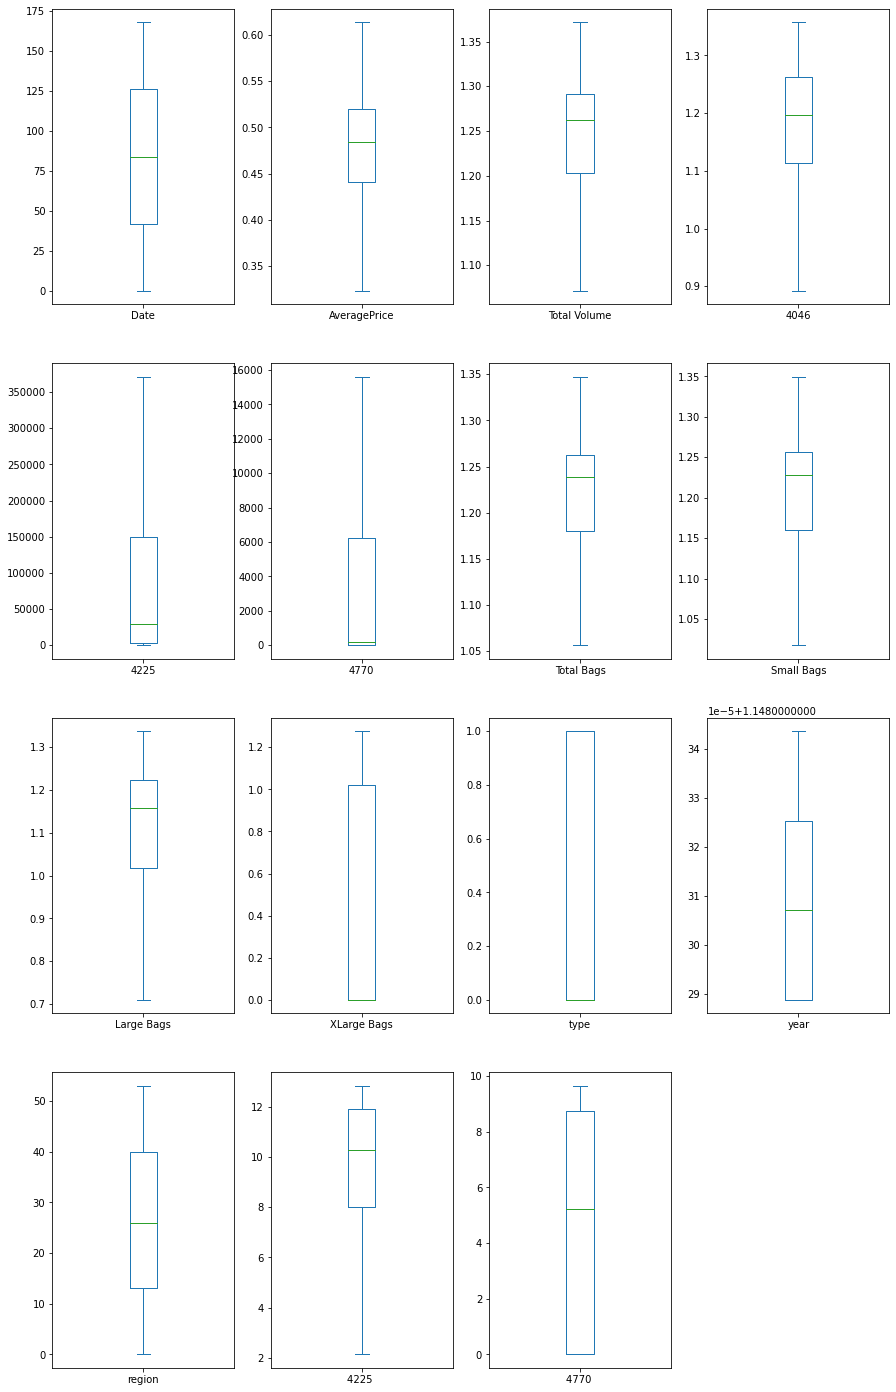

In [125]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,25))

In [126]:
df.skew()

Date            0.000117
AveragePrice   -0.211955
Total Volume   -0.332904
4046           -0.928063
4225            1.219271
4770            1.212184
Total Bags     -0.646250
Small Bags     -0.802818
Large Bags     -1.064121
XLarge Bags     0.758642
type            0.000329
year            0.214597
region          0.000030
4225           -0.733301
4770           -0.101183
dtype: float64

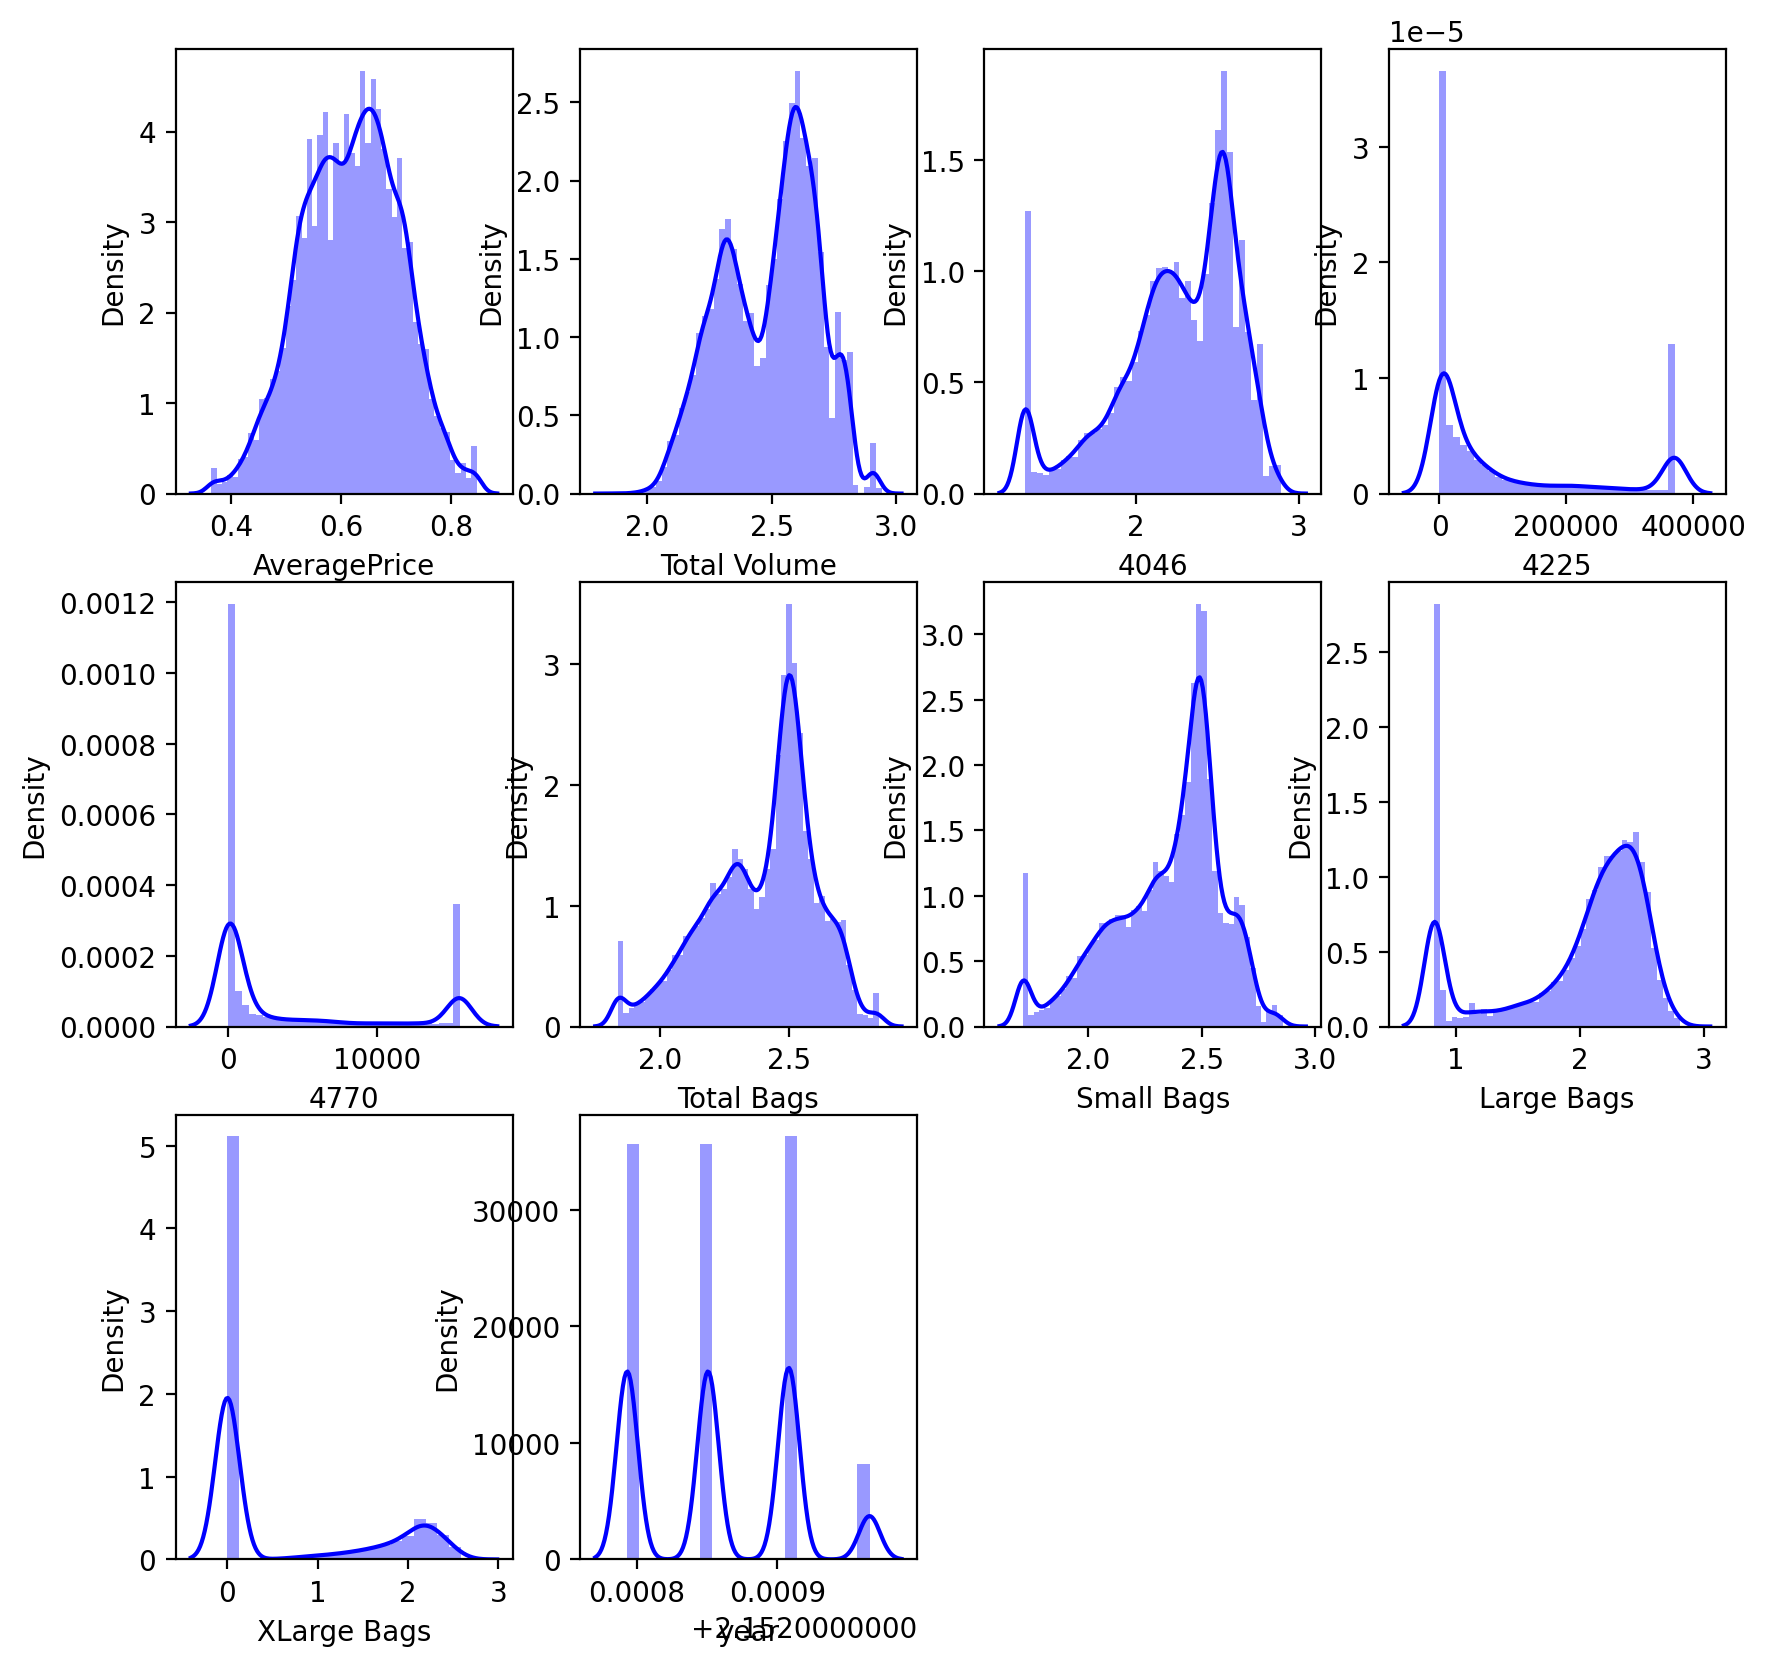

In [62]:
plt.figure(figsize=(10,10),dpi=200)
for i in enumerate(numerical_features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

# Observation:
- Looking at the above distribution plots we can see that there is no skewness prsent beacuse we had deal with outlier .
- There are many that are showing a bell shape curve indicating a normal distribution.

## Variance Inflation Factor

In [127]:
df2=pd.DataFrame(data=df)       # copying the dataframe
df2

Date  AveragePrice  Total Volume      4046       4225    4770  \
0       51.0      0.478065      1.250117  1.122497   54454.85   48.16   
1       50.0      0.480925      1.246348  1.104236   44638.81   58.33   
2       49.0      0.409007      1.264141  1.111370  109149.67  130.50   
3       48.0      0.437925      1.254971  1.126069   71976.41   72.58   
4       47.0      0.470708      1.244591  1.118521   43838.39   75.78   
...      ...           ...           ...       ...        ...     ...   
18244  161.0      0.516709      1.216241  1.148868    1529.20    0.00   
18245  160.0      0.525687      1.210472  1.128133    3431.50    0.00   
18246  159.0      0.542290      1.210224  1.128141    2452.79  727.94   
18247  158.0      0.548100      1.214795  1.137871    2981.04  727.01   
18248  157.0      0.515552      1.216902  1.161273    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type      year  \
0        1.196840    1.196517    0.998080          0.0   0.0  1.148289   
1        1.199493    1.199187    1.000989          0.0   0.0  1.148289   
2        1.194867    1.194481    1.004631          0.0   0.0  1.148289   
3        1.184420    1.183682    1.020847          0.0   0.0  1.148289   
4        1.186379    1.185358    1.043536          0.0   0.0  1.148289   
...           ...         ...         ...          ...   ...       ...   
18244    1.209667    1.208742    1.083809          0.0   1.0  1.148344   
18245    1.198731    1.197666    1.069837          0.0   1.0  1.148344   
18246    1.199143    1.199008    0.940791          0.0   1.0  1.148344   
18247    1.203702    1.203569    0.953860          0.0   1.0  1.148344   
18248    1.206336    1.206274    0.899239          0.0   1.0  1.148344   

       region      4225      4770   
0         0.0  10.905146  3.895080  
1         0.0  10.706381  4.083115  
2         0.0  11.600485  4.879007  
3         0.0  11.184108  4.298373  
4         0.0  10.688288  4.340944  
...       ...        ...       ...  
18244    53.0   7.333154  0.000000  
18245    53.0   8.141044  0.000000  
18246    53.0   7.805389  6.591591  
18247    53.0   8.000363  6.590315  
18248    53.0   7.765200  5.418453  

[18249 rows x 15 columns]

In [128]:
x1=df2.iloc[:,:-2]  # Dropping last column from data frame
y1=df2.iloc[:,1]

In [129]:
x1

Date  AveragePrice  Total Volume      4046       4225    4770  \
0       51.0      0.478065      1.250117  1.122497   54454.85   48.16   
1       50.0      0.480925      1.246348  1.104236   44638.81   58.33   
2       49.0      0.409007      1.264141  1.111370  109149.67  130.50   
3       48.0      0.437925      1.254971  1.126069   71976.41   72.58   
4       47.0      0.470708      1.244591  1.118521   43838.39   75.78   
...      ...           ...           ...       ...        ...     ...   
18244  161.0      0.516709      1.216241  1.148868    1529.20    0.00   
18245  160.0      0.525687      1.210472  1.128133    3431.50    0.00   
18246  159.0      0.542290      1.210224  1.128141    2452.79  727.94   
18247  158.0      0.548100      1.214795  1.137871    2981.04  727.01   
18248  157.0      0.515552      1.216902  1.161273    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type      year  region  
0        1.196840    1.196517    0.998080          0.0   0.0  1.148289     0.0  
1        1.199493    1.199187    1.000989          0.0   0.0  1.148289     0.0  
2        1.194867    1.194481    1.004631          0.0   0.0  1.148289     0.0  
3        1.184420    1.183682    1.020847          0.0   0.0  1.148289     0.0  
4        1.186379    1.185358    1.043536          0.0   0.0  1.148289     0.0  
...           ...         ...         ...          ...   ...       ...     ...  
18244    1.209667    1.208742    1.083809          0.0   1.0  1.148344    53.0  
18245    1.198731    1.197666    1.069837          0.0   1.0  1.148344    53.0  
18246    1.199143    1.199008    0.940791          0.0   1.0  1.148344    53.0  
18247    1.203702    1.203569    0.953860          0.0   1.0  1.148344    53.0  
18248    1.206336    1.206274    0.899239          0.0   1.0  1.148344    53.0  

[18249 rows x 13 columns]

In [130]:
y1

0        0.478065
1        0.480925
2        0.409007
3        0.437925
4        0.470708
           ...   
18244    0.516709
18245    0.525687
18246    0.542290
18247    0.548100
18248    0.515552
Name: AveragePrice, Length: 18249, dtype: float64

In [131]:
x1.shape

(18249, 13)

In [132]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [133]:
calc_vif(x1)

variables   VIF FACTOR
0           Date     5.756974
1   AveragePrice   160.604098
2   Total Volume  9806.504858
3           4046   482.101951
4           4225     5.111651
5           4770     3.568292
6     Total Bags  7894.516393
7     Small Bags  2739.488864
8     Large Bags    75.005165
9    XLarge Bags     3.403926
10          type     7.520571
11          year  3363.037089
12        region     4.195159

## Checking The correletion


<AxesSubplot:>

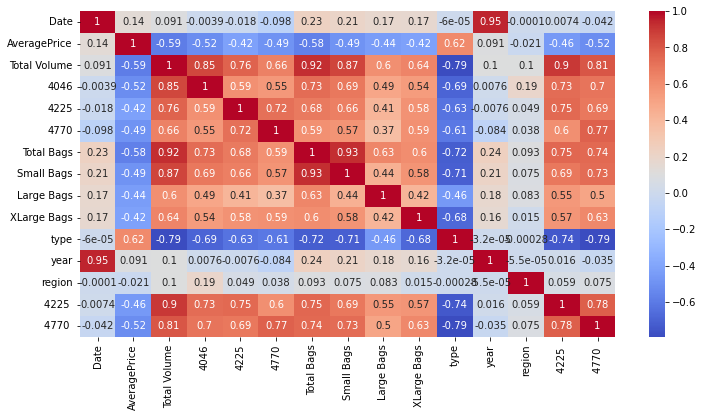

In [134]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [75]:
df.corr()["AveragePrice"].sort_values()

Total Volume   -0.592492
Total Bags     -0.580305
4046           -0.527409
4770           -0.518166
Small Bags     -0.492652
4770           -0.487395
4225           -0.459866
Large Bags     -0.450147
4225           -0.422139
XLarge Bags    -0.411467
region         -0.019623
year            0.091520
Date            0.144552
type            0.621017
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

## Observation:
- As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other.

- First we have to do some Feature Engineering on the categorical Features : region and type

# Scaling the independant variable (x) to get all the columns in a standard scale

In [92]:
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-0.01241679, -0.47379468, -0.33244626, ..., -1.7002522 ,
         0.45961048, -0.24496745],
       [-0.08136838, -0.62479226, -0.40617828, ..., -1.7002522 ,
         0.38355092, -0.19580358],
       [ 0.24642676, -0.56613024,  0.07838741, ..., -1.7002522 ,
         0.72569041,  0.0122915 ],
       ...,
       [-0.72918641, -0.42657018, -0.72305358, ...,  1.70081131,
        -0.7265492 ,  0.46006651],
       [-0.64850236, -0.34451976, -0.71908569, ...,  1.70081131,
        -0.65194007,  0.45973271],
       [-0.61118702, -0.14387917, -0.72377963, ...,  1.70081131,
        -0.741928  ,  0.15333598]])

In [93]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(18249, 13)
(18249, 1)


In [94]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [95]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  40 is 0.6903845152150003
R2 score correspond to random state  40 is 0.2931774742090333
R2 score correspond to random state  40 is 0.5304502012985393
R2 score correspond to random state  40 is 0.5246926887429381
R2 score correspond to random state  40 is 0.6831471933766433
R2 score correspond to random state  41 is 0.6999478757370874
R2 score correspond to random state  41 is 0.3062690499232089
R2 score correspond to random state  41 is 0.5476014371185247
R2 score correspond to random state  41 is 0.5394161013441805
R2 score correspond to random state  41 is 0.6977806870607492
R2 score correspond to random state  42 is 0.7044029062948807
R2 score correspond to random state  42 is 0.3072421219164313
R2 score correspond to random state  42 is 0.5284370814496255
R2 score correspond to random state  42 is 0.5283442897473482
R2 score correspond to random state  42 is 0.6837943681200671
R2 score correspond to random state  43 is 0.698382243520166
R2 score 

R2 score correspond to random state  66 is 0.7028510772356696
R2 score correspond to random state  67 is 0.6928978389051423
R2 score correspond to random state  67 is 0.2979872493362167
R2 score correspond to random state  67 is 0.5324818268618932
R2 score correspond to random state  67 is 0.5251709644618585
R2 score correspond to random state  67 is 0.6811040024406547
R2 score correspond to random state  68 is 0.6926470694751252
R2 score correspond to random state  68 is 0.31359494239246977
R2 score correspond to random state  68 is 0.5319511454039964
R2 score correspond to random state  68 is 0.5368247605769709
R2 score correspond to random state  68 is 0.6950417325893955
R2 score correspond to random state  69 is 0.6796637003856294
R2 score correspond to random state  69 is 0.3231090589148503
R2 score correspond to random state  69 is 0.5533785736897412
R2 score correspond to random state  69 is 0.543192503724288
R2 score correspond to random state  69 is 0.7036764342010907
R2 score

In [ ]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 80,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(LA,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

In [98]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 15.419033446875307


In [99]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.06144237781211986
Mean squared Error:  0.00669571100553445
Root Mean Absolute Error:  0.2478757305831288


Text(0, 0.5, 'Predicted_Y')

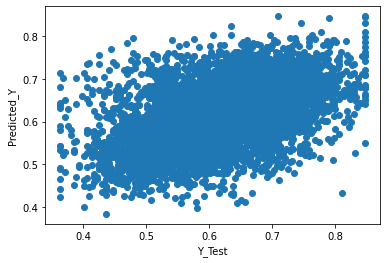

In [100]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

# Observation:
As above graph shown that it is predicting near to tha actual value and RMSE error is very less

In [101]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [102]:
#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(18249, 13)
(18249, 1)


In [103]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

# now we are taking region as output variable and try to prediction using classification method

In [104]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)

accuracy score correspond to random state  40 is 0.771210360285572
accuracy score correspond to random state  40 is 0.25884110908185287
accuracy score correspond to random state  41 is 0.7730366926780674
accuracy score correspond to random state  41 is 0.26398804582434005
accuracy score correspond to random state  42 is 0.7826664452930433
accuracy score correspond to random state  42 is 0.27145940561182136
accuracy score correspond to random state  43 is 0.7785156898555537
accuracy score correspond to random state  43 is 0.2621617134318446
accuracy score correspond to random state  44 is 0.77204051137307
accuracy score correspond to random state  44 is 0.2578449277768554
accuracy score correspond to random state  45 is 0.7886435331230284
accuracy score correspond to random state  45 is 0.2605014112568487
accuracy score correspond to random state  46 is 0.7821683546405446
accuracy score correspond to random state  46 is 0.26166362277934585
accuracy score correspond to random state  47 i

In [105]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 76,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [106]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 26.000332060435


In [107]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  26.646099801837508
Mean Score      :  26.646099801837508
STD score       :  0.0


In [108]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:

fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [110]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.01759134 1.        ]


[0.         0.10810811 1.        ]


[2. 1. 0.]


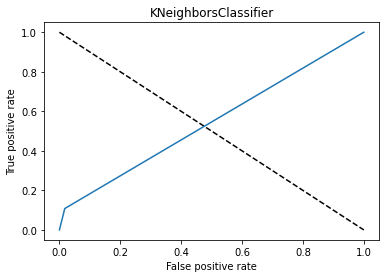

In [111]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

# Observation:
As from this data set we have following conclusion: - taking price as y variable is predicting well for this model as comapared to region - also r2 score value is also greater then accuracy score

In [ ]:
#save the model 
joblib.dump(KNN, 'Project_8.obj')

# Conclusions
- With the help of notebook I learnt how EDA can be carried out using Pandas and other plotting libraries.
- Also I have seen making use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
- I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. I also learnt how to create new features which will in turn help us to better predict the survival.
- I also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like type, year/date on the Average price increase/decrease rate.
The most important inference drawn from all this analysis is, I get to know what are the features on which price is highly positively and negatively coorelated with.
- I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.

# Hyper Parameter Tuning for KNeighbourRegressor

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

In [138]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y11 = label_encoder.fit_transform(y1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(x1,y11, test_size=0.33, random_state=94, shuffle=True)

In [140]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [141]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

In [142]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=cv_method,
                      verbose=1,  
                      scoring='accuracy', 
                      return_train_score=True)

In [143]:
grid.fit(X_train,y_train)

Fitting 15 folds for each of 84 candidates, totalling 1260 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=1)